In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pydicom
from os import listdir
from os.path import isfile, join
import os
import cv2 as cv
#import SimpleITK as sitk
import pydicom._storage_sopclass_uids

# metadata
fileMeta = pydicom.Dataset()
fileMeta.MediaStorageSOPClassUID = pydicom._storage_sopclass_uids.CTImageStorage
fileMeta.MediaStorageSOPInstanceUID = pydicom.uid.generate_uid()
fileMeta.TransferSyntaxUID = pydicom.uid.ExplicitVRLittleEndian

In [2]:
def selection_sort(dicom):
    
    for i in range(len(dicom)):
                
        for j in range(i + 1, len(dicom)):
            value = dicom[j].SliceLocation
            value_d = dicom[j]
            if value < dicom[i].SliceLocation:
                                
                temp = dicom[i]
                dicom[i] = value_d
                dicom[j] = temp
                
        print(i)
    return dicom

def img_loader(images_path):
    path_tmp = []
    name_tmp = []
    img_tmp = []

    for (path, dir, files) in os.walk(images_path):
        for filename in files:
            ext = os.path.splitext(filename)[-1]
            
            if ext == '.dcm' or '.IMA':
                print("%s/%s" % (path, filename))
                path_tmp.append(path)
                name_tmp.append(filename)

    dcm_tmp = []

    for i in range(len(path_tmp)):
        dcm_p = pydicom.dcmread(path_tmp[i] + '/' + name_tmp[i], force = True)
        dcm_tmp.append(dcm_p)
    
    r_dcm_tmp = selection_sort(dcm_tmp)
    
    for ii in range(len(r_dcm_tmp)):
        img_tmp.append(r_dcm_tmp[ii].pixel_array)
        
        
    return dcm_tmp, img_tmp


def fourier(img):
    #f = np.fft.fft2(img)
    #fshift = np.fft.fftshift(f)
    #m_spectrum = 20*np.log(np.abs(fshift))
    
    norm_image = cv.normalize(img, None, alpha=0, beta=1, norm_type=cv.NORM_MINMAX, dtype=cv.CV_32F)
    amp = (np.fft.fftshift(np.fft.fft2(norm_image)))
    amp_log = np.log(np.abs(amp))
    norm_amp = cv.normalize(amp_log, None, alpha=0, beta=1, norm_type=cv.NORM_MINMAX, dtype=cv.CV_32F)
    
    
    plt.figure()
    plt.subplot(121), plt.imshow(norm_image, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(norm_amp, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    
    #plt.show()
    
    return amp, amp_log, norm_amp

def ifourier(amp):
    restored = np.abs(np.fft.ifft2(np.fft.ifftshift(amp)))
    
    return restored

def histdraw(img, cnt, rng):
    plt.figure()
    hist,bins = np.histogram(img.ravel(), cnt, rng)
    plt.hist(img.ravel(), cnt, rng); 
    plt.show()
    
    return hist, bins
   


In [3]:
nomoco_img_path = 'C:/Users/User/Desktop/Project Support/Motion correction/best/BMC_BestCase/095-LM-00-PSFTOF_000_000.v 8i 5s'
moco_img_path = 'C:/Users/User/Desktop/Project Support/Motion correction/best/BMC_BestCase/095-BMC-LM-00-ac_mc_000_000.v 8i 5s'

nomoco_dcm, nomoco_img = img_loader(nomoco_img_path)
moco_dcm, moco_img = img_loader(moco_img_path)


C:/Users/User/Desktop/Project Support/Motion correction/best/BMC_BestCase/095-LM-00-PSFTOF_000_000.v 8i 5s/095-LM-00-PSFTOF_000_000.v 8i 5s159.dcm
C:/Users/User/Desktop/Project Support/Motion correction/best/BMC_BestCase/095-LM-00-PSFTOF_000_000.v 8i 5s/095-LM-00-PSFTOF_000_000.v 8i 5s160.dcm
C:/Users/User/Desktop/Project Support/Motion correction/best/BMC_BestCase/095-LM-00-PSFTOF_000_000.v 8i 5s/095-LM-00-PSFTOF_000_000.v 8i 5s161.dcm
C:/Users/User/Desktop/Project Support/Motion correction/best/BMC_BestCase/095-LM-00-PSFTOF_000_000.v 8i 5s/095-LM-00-PSFTOF_000_000.v 8i 5s162.dcm
C:/Users/User/Desktop/Project Support/Motion correction/best/BMC_BestCase/095-LM-00-PSFTOF_000_000.v 8i 5s/095-LM-00-PSFTOF_000_000.v 8i 5s163.dcm
C:/Users/User/Desktop/Project Support/Motion correction/best/BMC_BestCase/095-LM-00-PSFTOF_000_000.v 8i 5s/095-LM-00-PSFTOF_000_000.v 8i 5s164.dcm
C:/Users/User/Desktop/Project Support/Motion correction/best/BMC_BestCase/095-LM-00-PSFTOF_000_000.v 8i 5s/095-LM-00-P

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
C:/Users/User/Desktop/Project Support/Motion correction/best/BMC_BestCase/095-BMC-LM-00-ac_mc_000_000.v 8i 5s/095-BMC-LM-00-ac_mc_000_000.v 8i 5s0.dcm
C:/Users/User/Desktop/Project Support/Motion correction/best/BMC_BestCase/095-BMC-LM-00-ac_mc_000_000.v 8i 5s/095-BMC-LM-00-ac_mc_000_000.v 8i 5s1.dcm
C:/Users/User/Desktop/Project Support/Motion correction/best/BMC_BestCase/095-BMC-LM-00-ac_mc_000_000.v 8i 5s/095-BMC-LM-00-ac_mc_000_000.v 8i 5s10.dcm
C:/Users/User/Deskto

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158


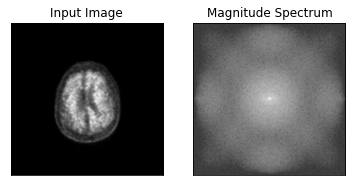

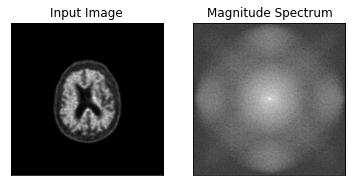

In [4]:
nomoco_amp, nomoco_amplog, nomoco_norm_amp = fourier(nomoco_img[60])
moco_amp, moco_amplog, moco_norm_amp = fourier(moco_img[60])


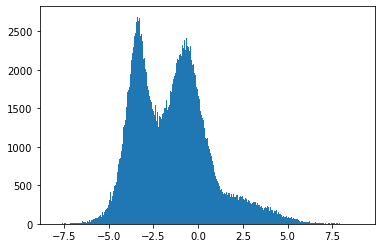

(array([   0,    2,    2,    0,    0,    2,    0,    4,    2,    4,    4,
           0,    0,    2,    2,    4,    4,    6,    6,    8,    6,    6,
          14,   10,   10,   10,   10,   34,   22,   26,   26,   14,   30,
          28,   48,   26,   46,   48,   62,   64,   76,   74,   86,  102,
         108,   94,  148,  118,  152,  182,  190,  206,  238,  308,  408,
         300,  364,  422,  486,  510,  544,  678,  782,  838,  848,  950,
        1036, 1256, 1286, 1346, 1510, 1712, 1736, 1770, 1940, 2131, 2220,
        2300, 2440, 2476, 2614, 2688, 2634, 2666, 2438, 2462, 2368, 2144,
        2150, 2012, 1976, 1788, 1742, 1656, 1604, 1576, 1494, 1458, 1414,
        1540, 1328, 1456, 1256, 1396, 1388, 1364, 1420, 1444, 1504, 1602,
        1478, 1520, 1536, 1724, 1710, 1814, 1874, 1918, 1956, 2090, 2142,
        2128, 2186, 2198, 2174, 2320, 2282, 2384, 2256, 2406, 2312, 2292,
        2244, 2304, 2124, 2056, 2072, 1956, 1934, 1776, 1744, 1662, 1614,
        1466, 1408, 1372, 1342, 1238, 

In [5]:
img = moco_amplog

histdraw(img, 300 ,[int(np.min(img)), int(np.max(img))])

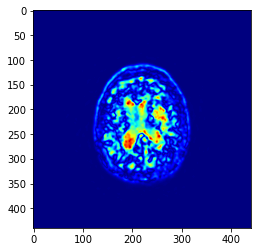

In [7]:
diff_amp = moco_amp - nomoco_amp
restored_diff = ifourier(diff_amp)

plt.figure()
plt.imshow(restored_diff, cmap = 'jet')